In [9]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [10]:
BATCH_SIZE=32
IMAGE_SIZE=256
CHANNELS=3
EPOCHS=50

In [11]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
       
)

Found 2152 files belonging to 3 classes.


In [12]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

(32, 256, 256, 3)
[1 0 0 1 1 1 1 2 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0]


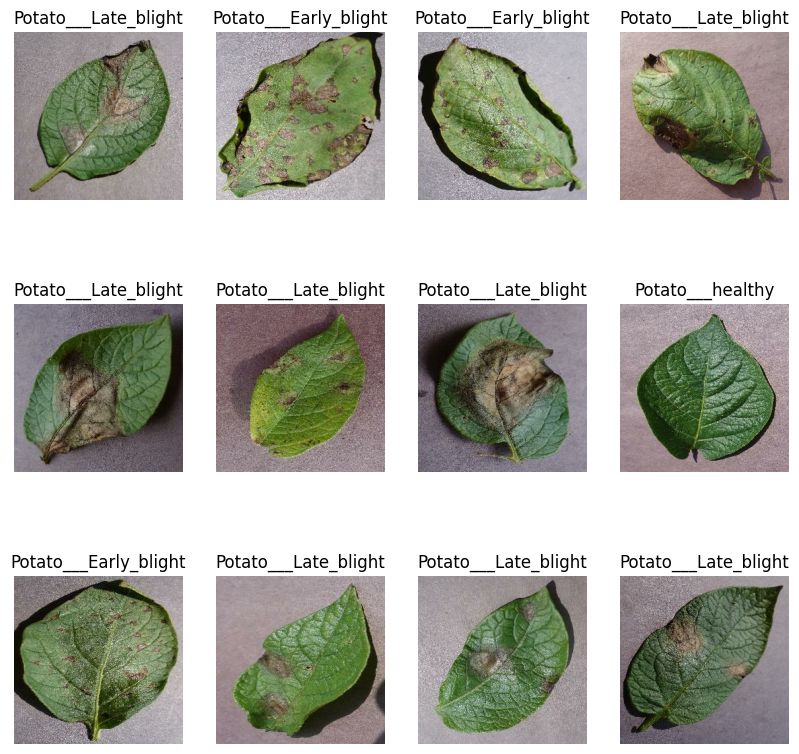

In [21]:
#the Size of batch of image is 32
plt.figure(figsize=(10,10))
for image_batch , labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    
    # To print image
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [24]:
# 80% ==>training
# 20% ==> test
     # 10% ==>Validation
     # 10% ==>Test

In [26]:
train_size=0.8  
len(dataset)*train_size

54.400000000000006

In [28]:
train_ds=dataset.take(54)
len(train_ds)

54

In [30]:
test_ds= dataset.skip(54)
len(test_ds)

14

In [31]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [33]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [34]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [36]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, suffle_size=10000):
    assert(train_split+test_split+val_split)==1
    ds_size=len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=13)
        
    train_size = int(train_split*ds_size)
    val_size= int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    
    return train_ds, val_ds, test_ds

In [38]:
train_ds, val_ds, test_ds= get_dataset_partitions_tf(dataset)

In [40]:
len(train_ds)

54

In [41]:
len(val_ds)

6

In [42]:
len(test_ds)

8

In [45]:
#suffle- changes in batch help in performance , cache- this will help to train faster , prefetch- performance tunning
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [47]:
for image_batch , labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[198. 196. 201.]
  [191. 189. 194.]
  [184. 182. 187.]
  ...
  [194. 189. 196.]
  [194. 189. 196.]
  [196. 191. 198.]]

 [[195. 193. 198.]
  [191. 189. 194.]
  [188. 186. 191.]
  ...
  [195. 190. 197.]
  [192. 187. 194.]
  [190. 185. 192.]]

 [[192. 190. 195.]
  [192. 190. 195.]
  [193. 191. 196.]
  ...
  [200. 195. 202.]
  [195. 190. 197.]
  [190. 185. 192.]]

 ...

 [[172. 167. 173.]
  [170. 165. 171.]
  [160. 155. 161.]
  ...
  [150. 145. 152.]
  [162. 157. 164.]
  [178. 173. 180.]]

 [[162. 157. 163.]
  [158. 153. 159.]
  [148. 143. 149.]
  ...
  [163. 158. 165.]
  [158. 153. 160.]
  [151. 146. 153.]]

 [[162. 157. 163.]
  [160. 155. 161.]
  [154. 149. 155.]
  ...
  [159. 154. 161.]
  [154. 149. 156.]
  [143. 138. 145.]]]


In [54]:
#Data Augmentation

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.expermiental.preprocessing.Rescalling(1.0/255)
]
)